In [4]:
from pandas import read_csv
df = read_csv("C:/Users/Admin/Documents/Datasets/Cars93.csv")
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [6]:
df_cars = df[["Price", "MPG.highway"]]

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4) # Right now 4 is decided randomly for explanation purpose
model = km.fit(df_cars[["Price", "MPG.highway"]])
df_cars["cluster_label"] = model.labels_

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
col = []
for i in df_cars.cluster_label:
    if i == 0:
        col.append("red")
    elif i == 1:
        col.append("blue")
    elif i == 2:
        col.append("orange")
    elif i == 3:
        col.append("black")

Text(0, 0.5, 'Mileage of car')

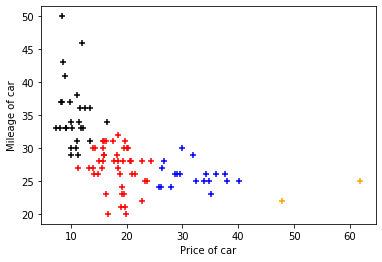

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df_cars.Price, df_cars["MPG.highway"], c=col, marker="+")
plt.xlabel("Price of car")
plt.ylabel("Mileage of car")

In [17]:
df_cars.cluster_label.value_counts()

0    45
3    27
1    19
2     2
Name: cluster_label, dtype: int64

In [18]:
model.cluster_centers_

array([[18.08888889, 27.06666667],
       [31.82105263, 25.78947368],
       [54.9       , 23.5       ],
       [10.59259259, 35.18518519]])

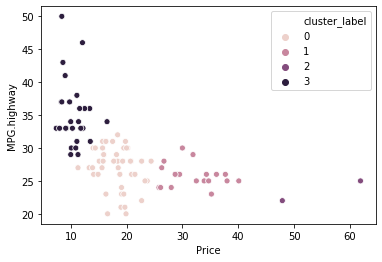

In [20]:
import seaborn as sb
sb.scatterplot(df_cars.Price, df_cars["MPG.highway"], hue=df_cars.cluster_label)

# ELBOW CURVE METHOD
X axis --> k
Y axis --> Within cluster sum of squares | Inertia

In [21]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
WCSS = []

In [22]:
from sklearn.cluster import KMeans
for i in k:
    df_cars = df[["Price", "MPG.highway"]]
    km = KMeans(n_clusters=i)
    model = km.fit(df_cars[["Price", "MPG.highway"]])
    WCSS.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Curve')

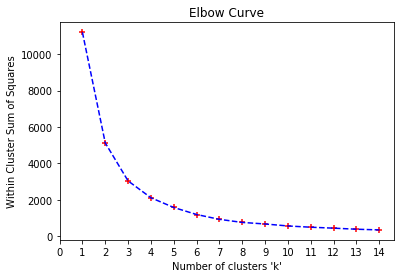

In [23]:
plt.scatter(k, WCSS, marker="+", c="red")
plt.plot(k, WCSS, c="blue", linestyle="dashed")
plt.xlabel("Number of clusters 'k'")
plt.ylabel("Within Cluster Sum of Squares")
plt.xticks(range(0, 15, 1))
plt.title("Elbow Curve")